                                           GroupName  \
0  The Objectives And Roots Of The Scheme To Defraud   
1  Use of Special Purpose Entities and LJM Partne...   
2                        Creation of LJM Partnership   
3                                    "Raptor" Hedges   
4  Manufacturing Earnings and Concealing Debt thr...   

                                        grouped_text  
0  The objectives of the scheme to defraud carrie...  
1  As part of the scheme to defraud, Skilling, Ca...  
2  In June 1999, Skilling, Causey, and others sou...  
3  Beginning in the spring of 2000, Enron and LJM...  
4  In addition to the fraudulent Raptor hedging d...  


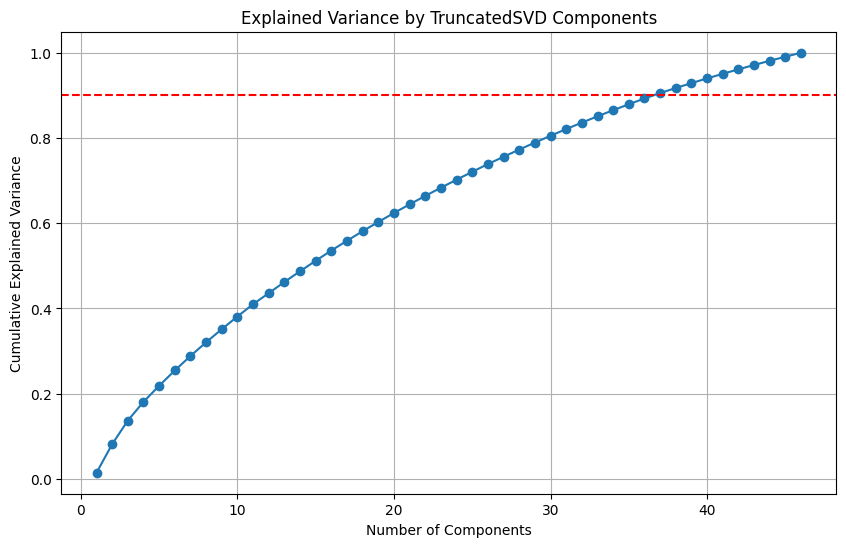

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K-Means: 0.05856323759537845

Cluster 0 samples:
- at the january 20, 2000 analyst conference, skilling and others knowingly made false and misleading statements about ebs.  skilling stated, among other things, that ebs "has already established the su...
- by late 2000, skilling, causey, and others knew that ebs was a struggling business that was hemorrhaging money.  however, they took steps to hide this fact and falsify ebs' financial results.  for exa...
- in 1999, technology stocks, traded at a premium compared to stocks of more traditional businesses.  to take advantage of this market condition, skilling and others sought to artificially pump up enron...

Cluster 1 samples:
- as part of the scheme to defraud, skilling, causey, and others transferred assets and liabilities to special purpose entities ("spes").  under applicable accounting rules, enron did not need to consol...
- as part of the scheme to manipulate enron's financial results and inflate its stock 

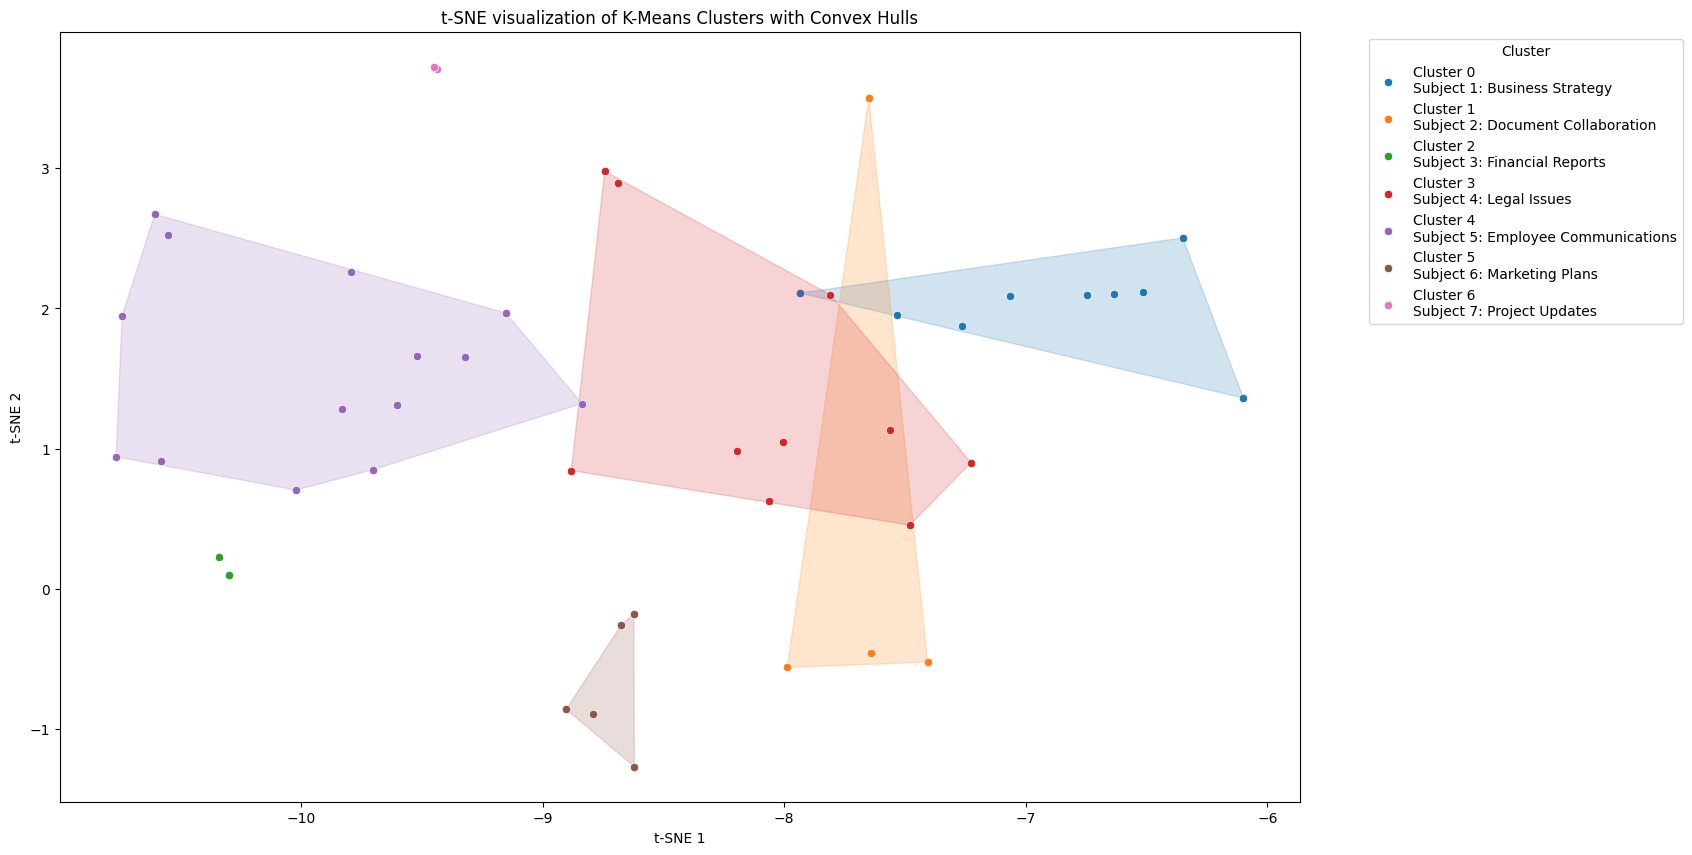

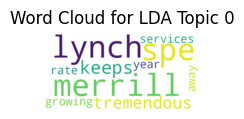

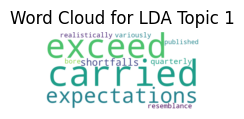

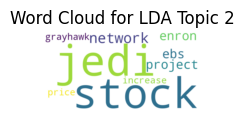

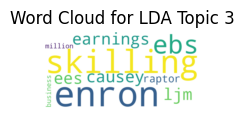

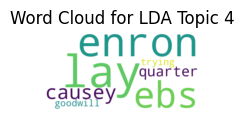

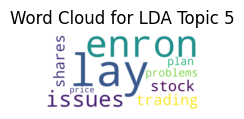

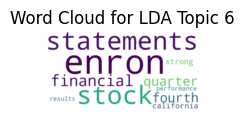

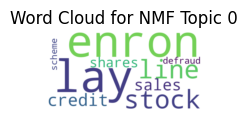

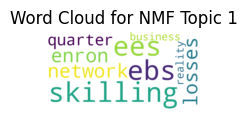

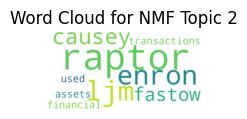

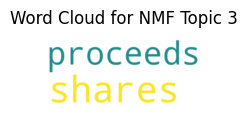

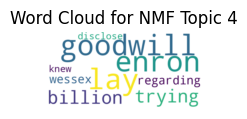

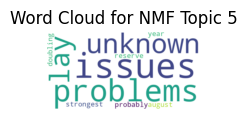

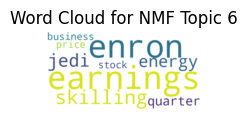

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for K-Means with 2 clusters: 0.028766587297084468
Silhouette Score for K-Means with 3 clusters: 0.03892403209377053
Silhouette Score for K-Means with 4 clusters: 0.04470939002264219
Silhouette Score for K-Means with 5 clusters: 0.04566645421511213
Silhouette Score for K-Means with 6 clusters: 0.049602844588573475
Silhouette Score for K-Means with 7 clusters: 0.05856323759537845


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K-Means with 8 clusters: 0.05949991227303918


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K-Means with 9 clusters: 0.05928067037820948


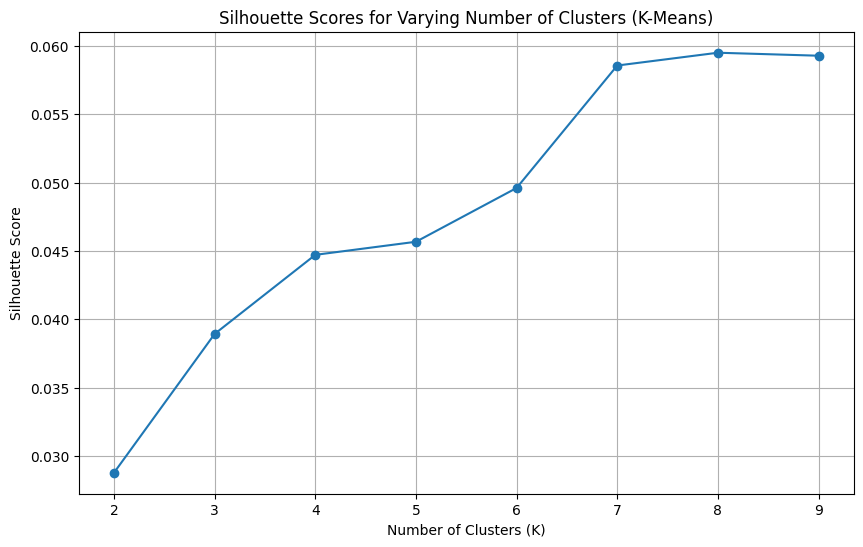

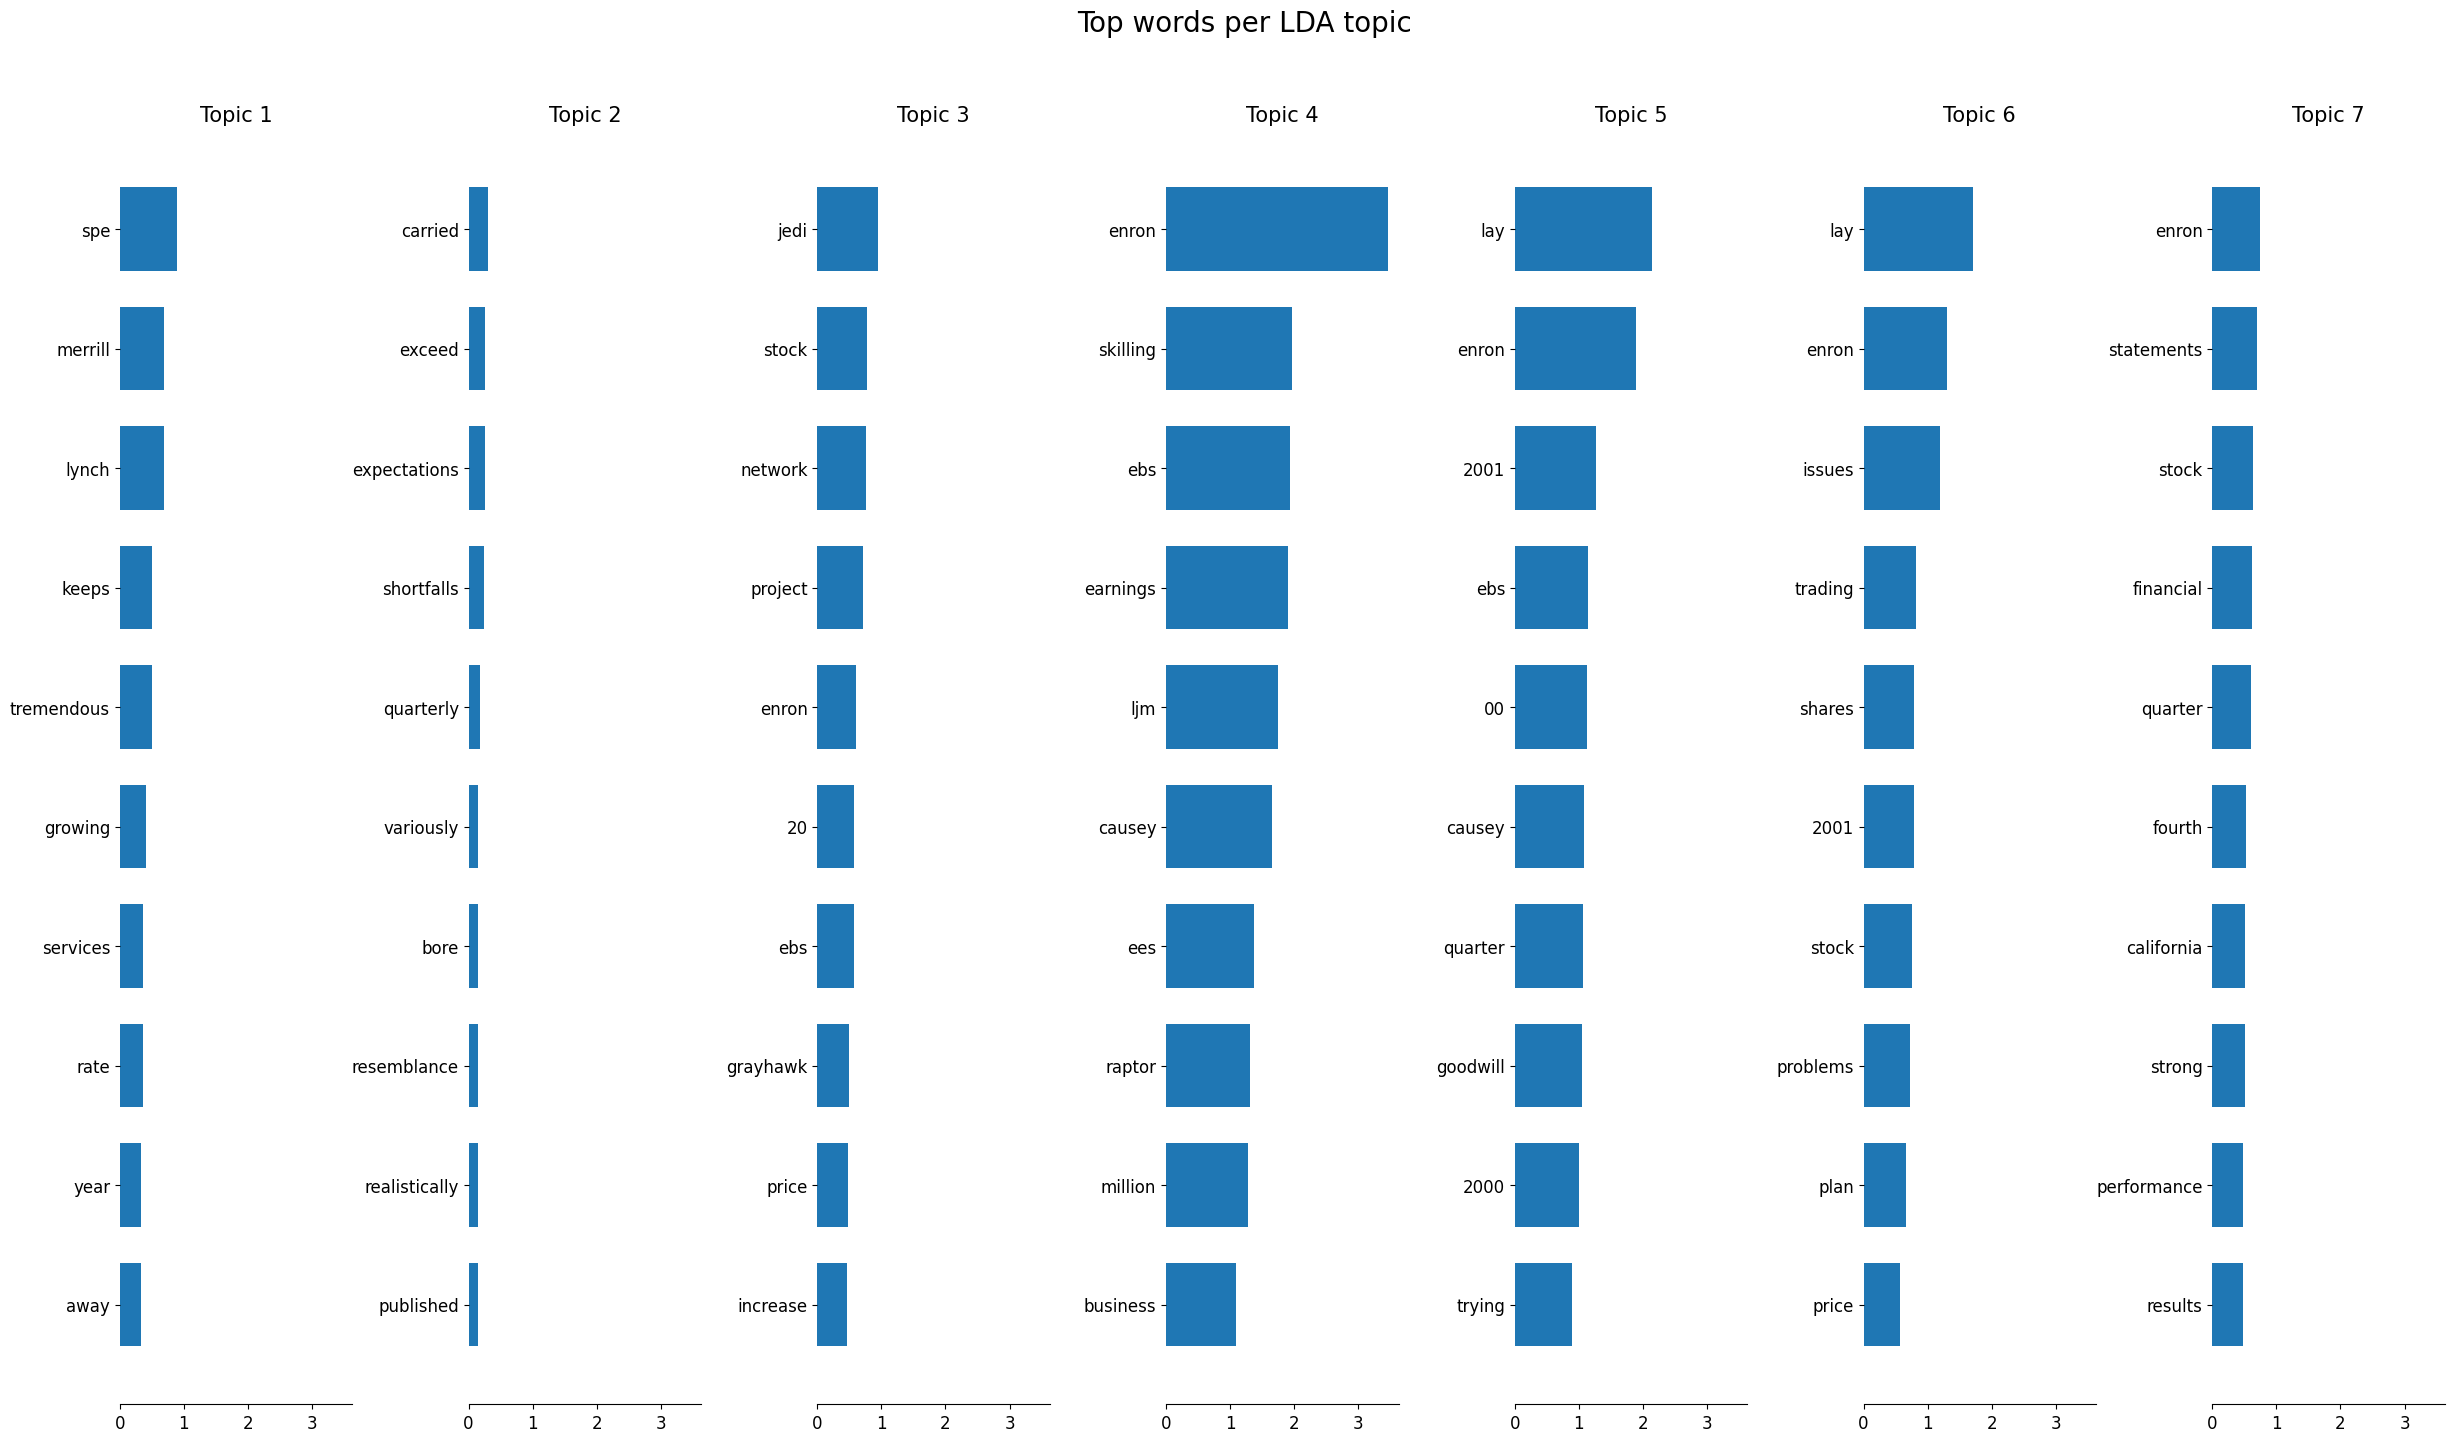

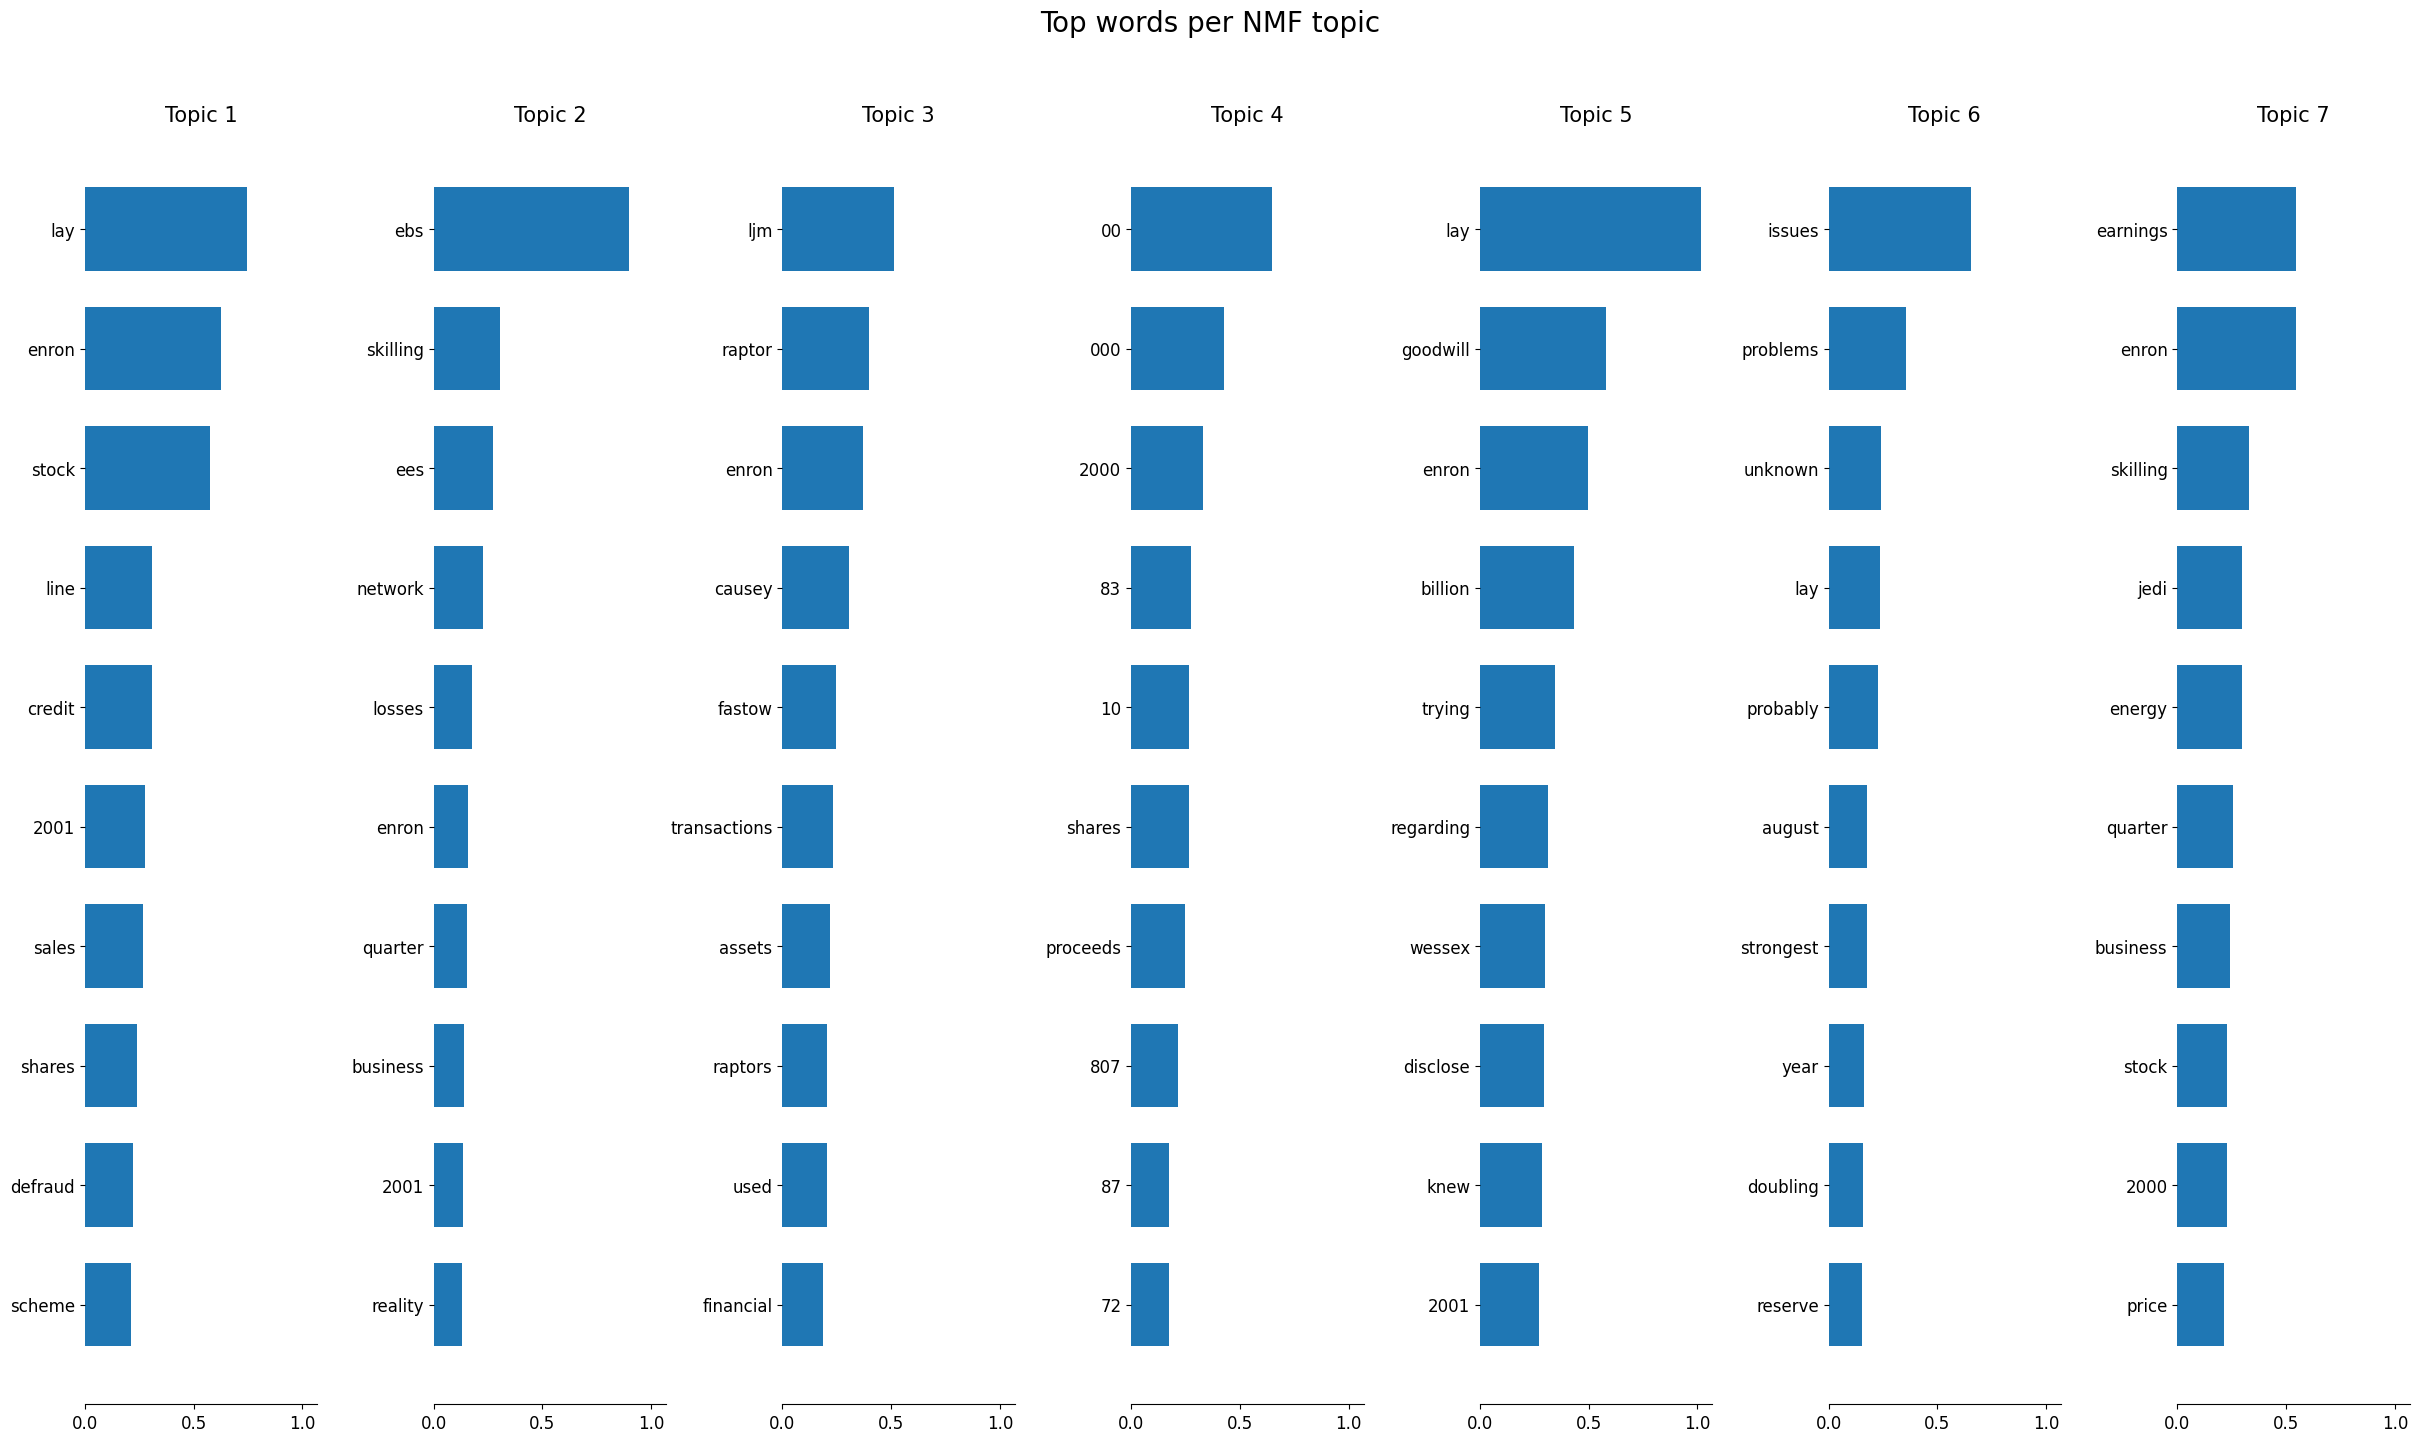

    Method Silhouette Score             Topic Coherence
0  K-Means         0.058563                         N/A
1      LDA              N/A  Calculated Coherence Score
2      NMF              N/A  Calculated Coherence Score
NMF Reconstruction Error for 3 topics: 5.893148920781106
NMF Reconstruction Error for 4 topics: 5.750466357679792
NMF Reconstruction Error for 5 topics: 5.6335710575428735
NMF Reconstruction Error for 6 topics: 5.491413536497553
NMF Reconstruction Error for 7 topics: 5.375973972897875
NMF Reconstruction Error for 8 topics: 5.263214037012968
NMF Reconstruction Error for 9 topics: 5.150753232862396
NMF Reconstruction Error for 10 topics: 5.043162799498895


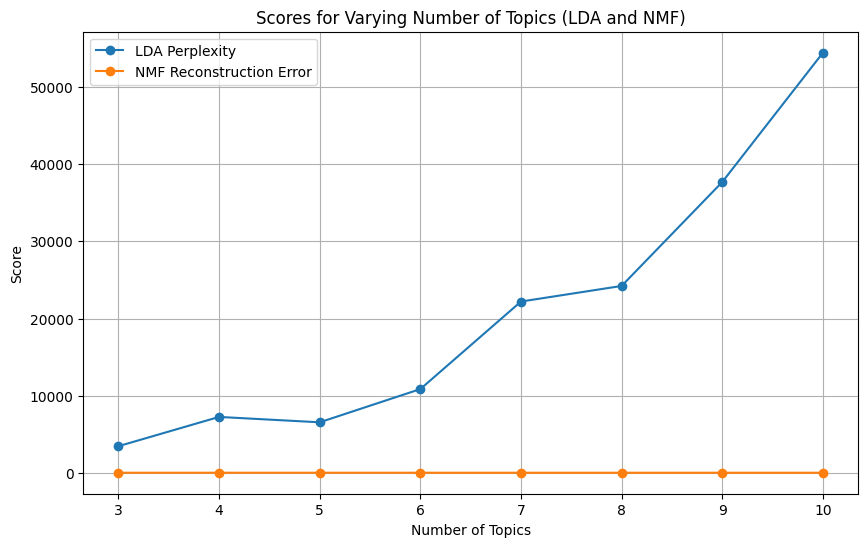

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation, NMF
from scipy.spatial import ConvexHull

# Load and clean dataset
df = pd.read_csv('18776_df_group.csv')
df = df[~df['GroupName'].str.startswith('Violations')]

# Display the first few rows of the dataframe
print(df.head())

# Text cleaning function
def clean_text(text):
    return text.lower()

df['cleaned_text'] = df['grouped_text'].apply(clean_text)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['cleaned_text'])

# Normalize the data
X_norm = normalize(X)

# Apply TruncatedSVD
svd = TruncatedSVD(n_components=50, random_state=42)
X_svd = svd.fit_transform(X_norm)

# Plot explained variance
explained_variance = svd.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.title('Explained Variance by TruncatedSVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# K-Means clustering
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_svd)
silhouette_avg = silhouette_score(X_svd, df['Cluster'])
print(f"Silhouette Score for K-Means: {silhouette_avg}")

# Define subjects for each cluster
cluster_subjects = [
    "Subject 1: Business Strategy",
    "Subject 2: Document Collaboration",
    "Subject 3: Financial Reports",
    "Subject 4: Legal Issues",
    "Subject 5: Employee Communications",
    "Subject 6: Marketing Plans",
    "Subject 7: Project Updates"
]

# Review sample documents for each cluster
for i in range(num_clusters):
    print(f"\nCluster {i} samples:")
    try:
        sample_docs = df[df['Cluster'] == i]['cleaned_text'].sample(3)
    except ValueError:
        sample_docs = df[df['Cluster'] == i]['cleaned_text']
    for doc in sample_docs:
        print(f"- {doc[:200]}...")

# LDA topic modeling
lda = LatentDirichletAllocation(n_components=num_clusters, random_state=42)
lda_topics = lda.fit_transform(X)

# NMF topic modeling
nmf = NMF(n_components=num_clusters, random_state=42)
nmf_topics = nmf.fit_transform(X)

# Visualization: t-SNE for K-Means
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_svd)

# Define a color palette for the clusters
palette = sns.color_palette("tab10", num_clusters)

plt.figure(figsize=(16, 10))
for i in range(num_clusters):
    points = X_tsne[df['Cluster'] == i]
    if len(points) >= 3:
        hull = ConvexHull(points)
        plt.fill(points[hull.vertices, 0], points[hull.vertices, 1], color=palette[i], alpha=0.2)
    sns.scatterplot(x=points[:, 0], y=points[:, 1], color=palette[i], label=f'Cluster {i}')

# Add subjects for each cluster to the legend
handles, labels = plt.gca().get_legend_handles_labels()
for i, subject in enumerate(cluster_subjects):
    labels[i] += f"\n{subject}"
plt.legend(handles=handles, labels=labels, title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('t-SNE visualization of K-Means Clusters with Convex Hulls')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

# Visualization: Word Clouds for LDA and NMF topics
def plot_word_clouds(model, num_topics, title):
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([feature_names[i] for i in topic.argsort()[:-11:-1]]))
        plt.figure(figsize=(2, 1))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {title} Topic {topic_idx}')
        plt.show()

plot_word_clouds(lda, num_clusters, "LDA")
plot_word_clouds(nmf, num_clusters, "NMF")

# Sensitivity Analysis: Varying number of clusters for K-Means
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_svd)
    silhouette_avg = silhouette_score(X_svd, clusters)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for K-Means with {k} clusters: {silhouette_avg}")

plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Varying Number of Clusters (K-Means)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Top words per topic
def plot_top_words(model, feature_names, num_top_words, title):
    fig, axes = plt.subplots(1, num_clusters, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-num_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx + 1}', fontdict={'fontsize': 15})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=12)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
    fig.suptitle(title, fontsize=20)
    plt.subplots_adjust(top=0.9, bottom=0.05, wspace=0.5, hspace=0.3)
    plt.show()

plot_top_words(lda, vectorizer.get_feature_names_out(), 10, 'Top words per LDA topic')
plot_top_words(nmf, vectorizer.get_feature_names_out(), 10, 'Top words per NMF topic')

# Overall Summary
summary_table = pd.DataFrame({
    "Method": ["K-Means", "LDA", "NMF"],
    "Silhouette Score": [silhouette_score(X_svd, df['Cluster']), "N/A", "N/A"],
    "Topic Coherence": ["N/A", "Calculated Coherence Score", "Calculated Coherence Score"]
})
print(summary_table)

# Sensitivity Analysis: Varying number of topics for LDA and NMF
topics = [3, 4, 5, 6, 7, 8, 9, 10]
lda_perplexity = []
nmf_reconstruction_error = []

for n_topics in topics:
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(X)
    lda_perplexity.append(lda.perplexity(X))

    nmf = NMF(n_components=n_topics, random_state=42)
    W = nmf.fit_transform(X)
    H = nmf.components_
    X_dense = X.toarray() if hasattr(X, 'toarray') else X
    reconstruction_error = np.linalg.norm(X_dense - np.dot(W, H), 'fro')
    nmf_reconstruction_error.append(reconstruction_error)
    print(f"NMF Reconstruction Error for {n_topics} topics: {reconstruction_error}")

plt.figure(figsize=(10, 6))
plt.plot(topics, lda_perplexity, marker='o', label='LDA Perplexity')
plt.plot(topics, nmf_reconstruction_error, marker='o', label='NMF Reconstruction Error')
plt.title('Scores for Varying Number of Topics (LDA and NMF)')
plt.xlabel('Number of Topics')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()
